In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
Hosp_test = pd.read_csv('hospitalizaciones_test.csv')
Hosp_train = pd.read_csv('hospitalizaciones_train.csv')

In [148]:
Hosp_test

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901
89996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257
89997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075
89998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772


In [149]:
Hosp_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


Visualizo los valores nulos (No hay)

In [150]:
Hosp_test.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
dtype: int64

In [151]:
Hosp_train.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

Contamos las apariciones de cada elemento por columna, para darnos un vistazo general de los datos de cada columna:

In [152]:
Hosp_test['Available Extra Rooms in Hospital'].value_counts()

3     26184
2     25360
4     20523
5      8627
6      2746
1      2173
7       917
12      497
24      487
21      436
13      351
8       307
11      293
0       280
10      277
14      233
20      166
9       143
Name: Available Extra Rooms in Hospital, dtype: int64

In [153]:
Hosp_test['Department'].value_counts()

gynecology            61853
radiotherapy          15183
anesthesia             7929
TB & Chest disease     4065
surgery                 970
Name: Department, dtype: int64

In [154]:
Hosp_test['Ward_Facility_Code'].value_counts()

D    21651
F    21601
B    18601
E    17235
A     8339
C     2573
Name: Ward_Facility_Code, dtype: int64

In [155]:
Hosp_test['doctor_name'].value_counts()

Dr Sarah     20879
Dr Sophia    19898
Dr John      16680
Dr Olivia    12156
Dr Nathan     8920
Dr Sam        5877
Dr Mark       4620
Dr Simon       592
Dr Isaac       378
Name: doctor_name, dtype: int64

In [156]:
Hosp_test['staff_available'].value_counts()

6     8351
7     8277
10    8276
3     8244
1     8204
8     8190
5     8153
4     8145
9     8123
0     8070
2     7967
Name: staff_available, dtype: int64

In [157]:
Hosp_test['Age'].value_counts()

31-40     26601
21-30     24764
41-50     14433
11-20      9776
61-70      4775
51-60      3985
71-80      3319
81-90      1503
0-10        615
91-100      229
Name: Age, dtype: int64

In [158]:
Hosp_test['patientid'].value_counts()

124677    8
44191     7
39971     7
125678    7
46071     7
         ..
78905     1
46771     1
63473     1
45835     1
33937     1
Name: patientid, Length: 62979, dtype: int64

In [159]:
Hosp_test['gender'].value_counts()

Female    71308
Male      10875
Other      7817
Name: gender, dtype: int64

In [160]:
Hosp_test['Type of Admission'].value_counts()

Trauma       55838
Emergency    24410
Urgent        9752
Name: Type of Admission, dtype: int64

In [161]:
Hosp_test['Severity of Illness'].value_counts()

Moderate    49378
Minor       23640
Extreme     16982
Name: Severity of Illness, dtype: int64

In [162]:
Hosp_test['health_conditions'].value_counts()

Other                  16076
High Blood Pressure    15313
Asthama                15086
Diabetes               14955
None                   14686
Heart disease          13884
Name: health_conditions, dtype: int64

In [163]:
Hosp_test['Visitors with Patient'].value_counts()

2     36828
4     30510
3     10179
6      4641
5      2256
8      1574
7       690
9       525
10      518
12      486
1       385
14      363
11      320
13      140
0       130
15      116
24       65
16       64
19       37
17       32
20       27
22       26
32       25
23       21
18       18
21       14
25        7
30        3
Name: Visitors with Patient, dtype: int64

In [164]:
Hosp_test['Insurance'].value_counts()

Yes    52461
No     37539
Name: Insurance, dtype: int64

In [165]:
Hosp_test['Admission_Deposit'].value_counts()

7100.510912    2
3871.475517    2
4571.130879    2
4056.391415    2
4358.327204    2
              ..
3849.509164    1
4204.634321    1
4785.227241    1
3972.250087    1
4713.868519    1
Name: Admission_Deposit, Length: 89984, dtype: int64

Tipos de datos:
-   Datos númericos:
    +   Discretos: Available Extra Rooms in Hospital, staff_available, Age(este indica un rango etario), Visitors with Patient
    +   Continuos: Admission_Deposit

-   Datos categoricos:
    +   Nominales: Department, Ward_Facility_Code, doctor_name, patientid(Aunque es un valor numerico, su valor no nos dice nada), Type of Admission, Severity of Illness, health_conditions,
    +   Binarios: gender, Insurance.

Analizamos la mediana (ordena los datos de menor a mayor o viceversa y elige justo el número que se encuentre en la mitad de todos)

In [166]:
Hosp_test['Available Extra Rooms in Hospital'].median()

3.0

In [167]:
Hosp_test['staff_available'].median()

5.0

In [168]:
Hosp_test['Visitors with Patient'].median()

3.0

In [169]:
Hosp_test['Admission_Deposit'].median()

4624.372449

In [170]:
#Para poder sacar la mediana de la columna Age, habra que trabajar un poco los datos
Hosp_test['Age'] = Hosp_test['Age'].replace({'0-10': 10, '11-20': 20, '21-30':30, '31-40':40, '41-50':50, '51-60':60, '61-70':70, '71-80':80, '81-90':90, '91-100':100})
Hosp_train['Age'] = Hosp_train['Age'].replace({'0-10': 10, '11-20': 20, '21-30':30, '31-40':40, '41-50':50, '51-60':60, '61-70':70, '71-80':80, '81-90':90, '91-100':100})
Hosp_test['Age']

0        30
1        60
2        60
3        30
4        60
         ..
89995    20
89996    40
89997    20
89998    70
89999    50
Name: Age, Length: 90000, dtype: int64

In [171]:
Hosp_test['Age'].median()

40.0

Analizamos la moda (Valor más repetido)

In [172]:
Hosp_test['Available Extra Rooms in Hospital'].mode()

0    3
Name: Available Extra Rooms in Hospital, dtype: int64

In [173]:
Hosp_test['staff_available'].mode()

0    6
Name: staff_available, dtype: int64

In [174]:
Hosp_test['Visitors with Patient'].mode()

0    2
Name: Visitors with Patient, dtype: int64

In [175]:
Hosp_test['Admission_Deposit'].mode()

0     3871.475517
1     4056.391415
2     4089.293066
3     4153.056015
4     4169.098742
5     4173.397932
6     4229.118777
7     4358.327204
8     4571.130879
9     4628.352251
10    4639.131644
11    4711.545880
12    4896.753056
13    5035.857725
14    5129.367286
15    7100.510912
Name: Admission_Deposit, dtype: float64

In [176]:
Hosp_test['Age'].mode()

0    40
Name: Age, dtype: int64

Analizamos la varianza (Nivel de dispersion de los datos)

In [177]:
Hosp_test['Available Extra Rooms in Hospital'].var()

7.191935523234207

In [178]:
Hosp_test['staff_available'].var()

9.976164845164947

In [179]:
Hosp_test['Visitors with Patient'].var()

4.89116616406849

In [180]:
#observamos una inmenza dispersion de datos con respecto a la media
Hosp_test['Admission_Deposit'].var()

1095952.5950874318

In [181]:
#Podemos observar una gran dispersion de datos con respecto a mla media
Hosp_test['Age'].var()

266.52834631495904

Buscamos los quantiles y la media
La media (sumar todos los datos y dividirlos por la cantidad de datos que tengas), no es conveniente tenerla en cuanta si hay outliers, ya que pueden afectar en gran medida su valor. En este caso podemos observar que la media y la mediana son muy parecidas por lo que podemos concluir que los outliers no afectan demasiado a su valor.

In [182]:
Hosp_test['Available Extra Rooms in Hospital'].quantile(0.25)

2.0

In [183]:
#Este valor corresponde a la media
Hosp_test['Available Extra Rooms in Hospital'].quantile(0.5)

3.0

In [184]:
Hosp_test['Available Extra Rooms in Hospital'].quantile(0.75)

4.0

In [185]:
Hosp_test['staff_available'].quantile(0.25)

2.0

In [186]:
#Este valor corresponde a la media
Hosp_test['staff_available'].quantile(0.5)

5.0

In [187]:
Hosp_test['staff_available'].quantile(0.75)

8.0

In [188]:
Hosp_test['Age'].quantile(0.25)

30.0

In [189]:
#Este valor corresponde a la media
Hosp_test['Age'].quantile(0.50)

40.0

In [190]:
Hosp_test['Age'].quantile(0.75)

50.0

In [191]:
Hosp_test['Visitors with Patient'].quantile(.25)

2.0

In [192]:
#Este valor corresponde a la media
Hosp_test['Visitors with Patient'].quantile(.5)

3.0

In [193]:
Hosp_test['Visitors with Patient'].quantile(.75)

4.0

In [194]:
#Este valor corresponde a la media
Hosp_test['Admission_Deposit'].quantile(.25)

4067.37553975

In [195]:
Hosp_test['Admission_Deposit'].quantile(.5)

4624.372449

In [196]:
Hosp_test['Admission_Deposit'].quantile(.75)

5088.489369499999

Vizualizo los Quartiles, la media y los outliers con grafico de cajas

<AxesSubplot: >

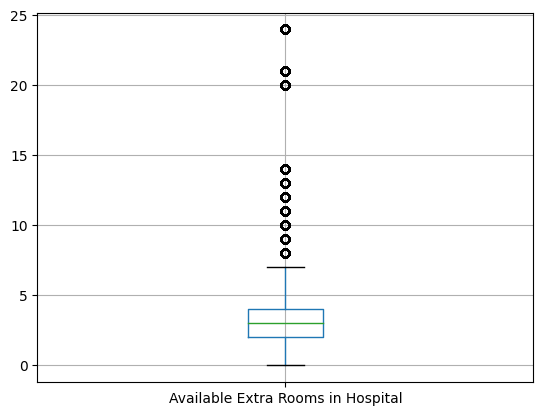

In [197]:
Hosp_test.boxplot(column=['Available Extra Rooms in Hospital'])
#Podemos ver que hay algunos outliers

<AxesSubplot: >

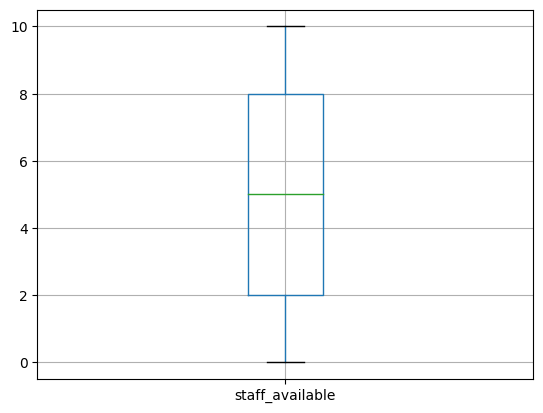

In [198]:
Hosp_test.boxplot(column=['staff_available'])
#Podemos ver que no hay outliers

<AxesSubplot: >

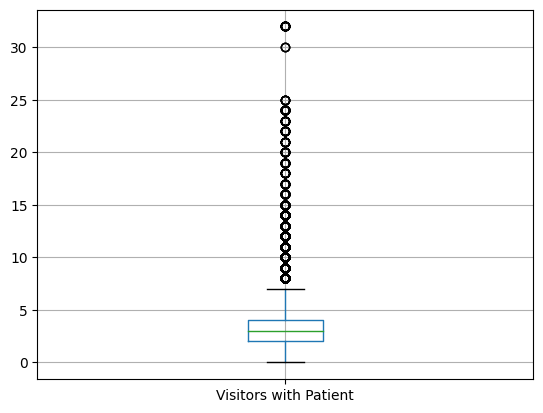

In [199]:
Hosp_test.boxplot(column=['Visitors with Patient'])

<AxesSubplot: >

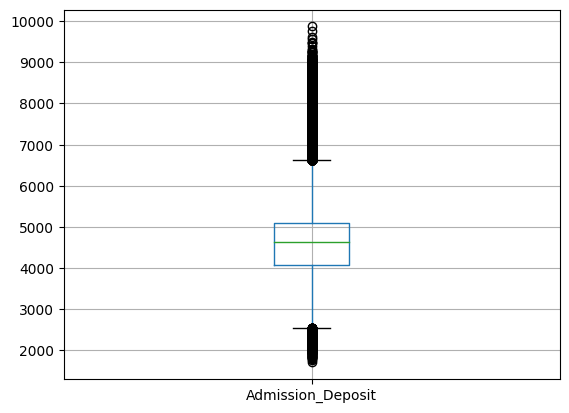

In [200]:
Hosp_test.boxplot(column=['Admission_Deposit'])

<AxesSubplot: >

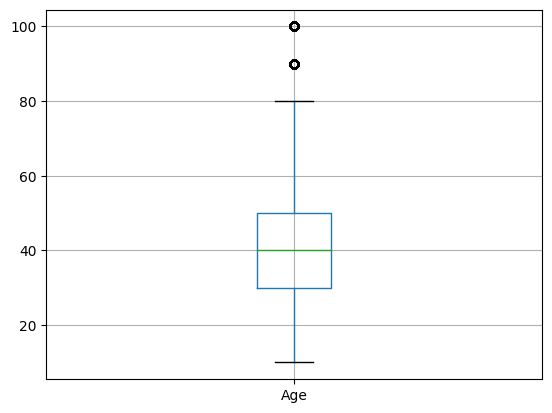

In [201]:
Hosp_test.boxplot(column=['Age'])

In [202]:
Hosp_train

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8
409996,5,gynecology,D,Dr Nathan,5,129292,30,Female,Trauma,Extreme,Other,4,No,4771.995223,9
409997,4,gynecology,D,Dr Sarah,9,11399,30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9
409998,10,gynecology,D,Dr Olivia,10,75003,30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9


Antes de seguir creare una columna para poder ver mejor la correlacion entre columnas. En esta columna llamare 1 a todos los valores, de la columna 'Stay (in days)',mayores o iguales a 8 y 0 al resto de valores 

In [203]:
Hosp_train['stay']=Hosp_train['Stay (in days)'].where(Hosp_train['Stay (in days)']<8,1)
Hosp_train['stay']=Hosp_train['stay'].where(Hosp_train['stay']<2,0)

In [204]:
Hosp_train['stay'].value_counts()

1    348618
0     61382
Name: stay, dtype: int64

LLevare a cabo visualizaciones con graficos de Correlacion lineal para ver el grado de correlacion de los diferentes datos numericos con la columna 'Stay (in days)'

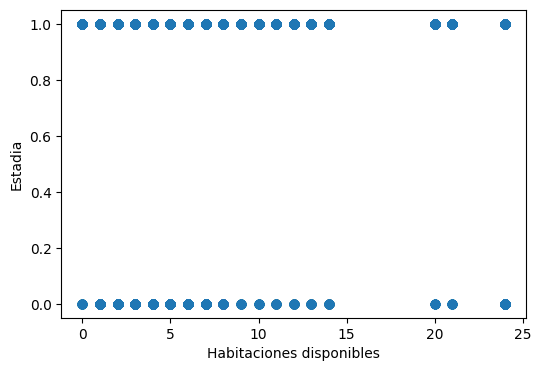

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(Hosp_train['Available Extra Rooms in Hospital'], y=Hosp_train['stay'], alpha= 0.8)
ax.set_xlabel('Habitaciones disponibles')
ax.set_ylabel('Estadia');
#no se puede distinguir una correlacion entra las columnas

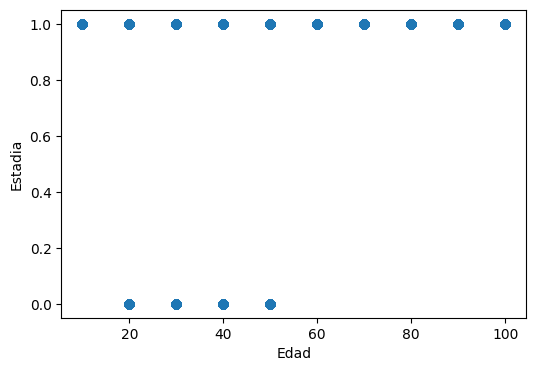

In [206]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(Hosp_train['Age'], y=Hosp_train['stay'], alpha= 0.8)
ax.set_xlabel('Edad')
ax.set_ylabel('Estadia');
#Si la edad es mayor a 50 hay mas probabilidades de una estadía larga

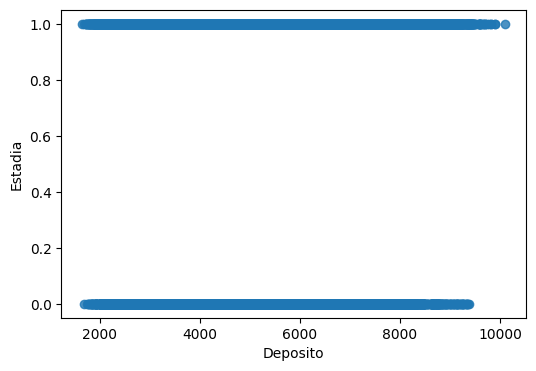

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(Hosp_train['Admission_Deposit'], y=Hosp_train['stay'], alpha= 0.8)
ax.set_xlabel('Deposito')
ax.set_ylabel('Estadia');
#De aqui solo podemos distinguir que aquellos que depositaron más de aprox 9000, tuvieron una estadia mas larga

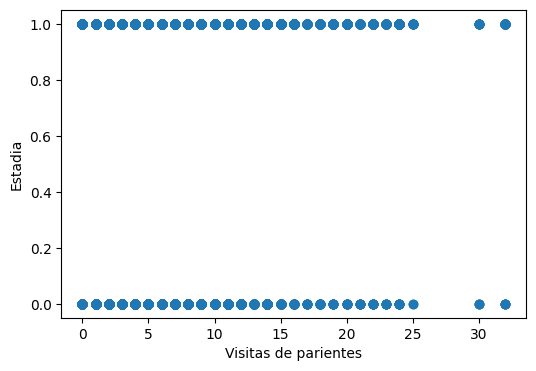

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(Hosp_train['Visitors with Patient'], y=Hosp_train['stay'], alpha= 0.8)
ax.set_xlabel('Visitas de parientes')
ax.set_ylabel('Estadia');
#No se puede distinguir una correlacion clara entre columnas

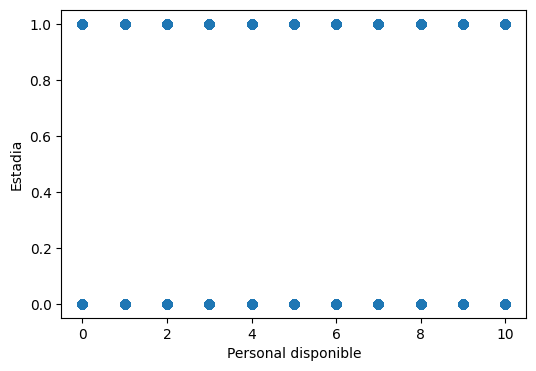

In [209]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(Hosp_train['staff_available'], y=Hosp_train['stay'], alpha= 0.8)
ax.set_xlabel('Personal disponible')
ax.set_ylabel('Estadia');


Analizare cada columna para saber si me puede arrojar una metrica que ayude o entorpezca a mi modelo de ML:

-   Avaible Extra Rooms in Hospital: ya que por habitacion pueden entrar diversos numeros de pacientes, no nos puede dar una metrica de cuanto espacio puede haber disponible en el hospital. Ej: puede haber una habitacion que tiene 4 camas, o 3 habitaciones de una cama cada una. Ademas en el grafico previamente hecho, se puede observar que no hay corelacion distinguible.

-   Departament: El departamento puede indicar una metrica fiable si es que cada departamento tiende a tener una cierta media de dias a sus pacientes.

-   Ward_Facility_Code: El codigo de habitacion del paciente no entrega ninguna informacion ya que no se cual es la 'regla' de este codigo.

-   doctor_name: El nombre del doctor no es una variable que pueda indicar cuantos dias se quedara internado un paciente, esto depende mas de el estado y la enfermedad del paciente.

-   staff_avaible: En el grafico previamente hecho podemos observar que no hay correlacion entre el personal disponible y la cantidad de dias de internación.

-   Patientid: A pesar de ayudar a saber quien es el paciente esto no nos ayudara, ya que no siempre se enferma uno de la misma patologia y por ende el tiempo de reposo en el hospital puede variar para una misma persona. Ademas podria crear una falsa correlacion, por ej: los numeros mayorees a x.

-   Age: esta metrica si nos puede ayudar ya que cuanto mas grande sea el paciente mas grave puede tornar a ser una enfermedad.

-   gender: Hay algunas enfermedades que afectan mas a un solo sexo, por lo que esto podria llegar a ayudar. Tendre que revisar si la variable afecta o no.

-   Type of Admission: Esto nos puede ayudar, ya que normalmente indiuca el tiempo de internado.

-   Severity of Illness: La situacion inicial del paciente suele indicar el tiempo de recuperacion del mismo.

-   health_conditions: La condicion de salud del paciente puede ayudarnos a saber una tendencia a el tiempo de recuperacion.

-   Visitors with Patient: La cantidad de parientes que lo visite no afectara la recuperacion ni el tiempo del mismo, como pudimos ver en el grafico anterior.

-   Insurance: Tendre que revisar si es una variable que afecte o no.

-   Admission_Deposit: No afectara su tiempo de recuperacion.

-   Stay (in days): Esto nos indica los dias de recuperacion.

Eliminare las columnas que no necesito

In [210]:
Hosp_train = Hosp_train.drop(columns=['Available Extra Rooms in Hospital','Ward_Facility_Code', 'doctor_name', 'staff_available', 'patientid','Visitors with Patient', 'Admission_Deposit'])


In [211]:
Hosp_train

,Department,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days),stay
0,gynecology,50,Female,Trauma,Extreme,Diabetes,Yes,8,1
1,gynecology,40,Female,Trauma,Minor,Heart disease,No,9,1
2,gynecology,30,Female,Trauma,Extreme,Diabetes,Yes,7,0
3,gynecology,40,Female,Urgent,Moderate,None,No,8,1
4,anesthesia,80,Male,Trauma,Moderate,Diabetes,No,34,1
...,...,...,...,...,...,...,...,...,...
409995,gynecology,40,Female,Trauma,Minor,Asthama,Yes,8,1
409996,gynecology,30,Female,Trauma,Extreme,Other,No,9,1
409997,gynecology,30,Female,Emergency,Minor,Asthama,Yes,9,1
409998,gynecology,30,Female,Trauma,Moderate,Other,Yes,9,1


In [212]:
Hosp_test = Hosp_test.drop(columns=['Available Extra Rooms in Hospital','Ward_Facility_Code', 'doctor_name', 'staff_available', 'patientid','Visitors with Patient', 'Admission_Deposit'])
Hosp_test

,Department,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance
0,gynecology,30,Female,Trauma,Moderate,Other,No
1,TB & Chest disease,60,Female,Trauma,Moderate,Asthama,Yes
2,radiotherapy,60,Other,Trauma,Moderate,None,No
3,gynecology,30,Female,Trauma,Moderate,None,Yes
4,anesthesia,60,Female,Trauma,Extreme,Diabetes,No
...,...,...,...,...,...,...,...
89995,gynecology,20,Female,Trauma,Minor,High Blood Pressure,No
89996,gynecology,40,Female,Emergency,Moderate,Other,No
89997,gynecology,20,Female,Emergency,Moderate,High Blood Pressure,No
89998,radiotherapy,70,Female,Trauma,Extreme,Diabetes,No


Vere la correlacion con las columnas faltantes

In [213]:
Hosp_train_mayor = Hosp_train[Hosp_train['stay']==1]
Hosp_train_mayor

,Department,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days),stay
0,gynecology,50,Female,Trauma,Extreme,Diabetes,Yes,8,1
1,gynecology,40,Female,Trauma,Minor,Heart disease,No,9,1
3,gynecology,40,Female,Urgent,Moderate,None,No,8,1
4,anesthesia,80,Male,Trauma,Moderate,Diabetes,No,34,1
5,gynecology,30,Female,Trauma,Moderate,Other,Yes,11,1
...,...,...,...,...,...,...,...,...,...
409995,gynecology,40,Female,Trauma,Minor,Asthama,Yes,8,1
409996,gynecology,30,Female,Trauma,Extreme,Other,No,9,1
409997,gynecology,30,Female,Emergency,Minor,Asthama,Yes,9,1
409998,gynecology,30,Female,Trauma,Moderate,Other,Yes,9,1


In [214]:
#Vemos la columna Departament
Hosp_train['Department'].value_counts()

gynecology            281625
radiotherapy           69132
anesthesia             36250
TB & Chest disease     18825
surgery                 4168
Name: Department, dtype: int64

In [215]:
Hosp_train_mayor['Department'].value_counts()
#Todos los casos de cirugia y anasthesia siguen siendo mayores a 8 dias de internacion, TB & chest disease casi no tuvo cambios. Los que departamentos de radiotherapy y gynecology son los más afectados,
#muchos de sus casos ean menores a 8 dias de internacion

gynecology            246616
radiotherapy           43005
anesthesia             36250
TB & Chest disease     18579
surgery                 4168
Name: Department, dtype: int64

In [216]:
#Vemos la columna gender
Hosp_train['gender'].value_counts()

Female    299502
Male       92605
Other      17893
Name: gender, dtype: int64

In [217]:
Hosp_train_mayor['gender'].value_counts()
#Podemos ver que el genero no afecta mucho la metrica, ya que female tenian 30000 casos aprox menores a 8 dias , male 20000 aprox y other 3000. Teniendo en cuenta el total de cada uno la diferencia
#en porcentaje es minima, por lo que podemos concluir con que no afecta a la metrica la columna gender.

Female    260842
Male       73591
Other      14185
Name: gender, dtype: int64

In [218]:
#Vemos la columna Type of Admission
Hosp_train['Type of Admission'].value_counts()

Trauma       254698
Emergency    111374
Urgent        43928
Name: Type of Admission, dtype: int64

In [219]:
Hosp_train_mayor['Type of Admission'].value_counts()
#Urgency tenia solo 1000 aprox casos que quedaron menos de 8 dias internados, Emergency 20000 aprox y Trauma 40000 aprox. Podemos concluir on que hay una mayor probabilidad de quedar internado por mas de 8 dias si entra por urgencias o emergencias

Trauma       216468
Emergency     95325
Urgent        36825
Name: Type of Admission, dtype: int64

In [220]:
#Vemos la columna Severity of Illness
Hosp_train['Severity of Illness'].value_counts()

Moderate    230819
Minor       107897
Extreme      71284
Name: Severity of Illness, dtype: int64

In [221]:
Hosp_train_mayor['Severity of Illness'].value_counts()
#Minor y Extreme solo tenian 10000 aprox que no se quedaron por mas de 8 dias, Moderate tenia 40000. Podemos concluir que los que entran con un estado moderado tienen menor posibilidad
# de quedar internados por mas de 8 dias

Moderate    197366
Minor        90792
Extreme      60460
Name: Severity of Illness, dtype: int64

In [222]:
#Vemos la columna healt_conditions
Hosp_train['health_conditions'].value_counts()

None                   137202
Other                   78335
High Blood Pressure     64089
Diabetes                58689
Asthama                 50428
Heart disease           21257
Name: health_conditions, dtype: int64

In [223]:
Hosp_train_mayor['health_conditions'].value_counts()
#Todos los que tienen enfermedades del corazon tienen una alta probabilidad de quedar internados por mas de 8 dias, los que no tienen condiciones especiales de salud tienen la menor probabilidad de quedar 
#internados por mas de 8 dias, Mientras que el resto esta en el medio.

None                   116485
Other                   66858
High Blood Pressure     54521
Diabetes                49912
Asthama                 42898
Heart disease           17944
Name: health_conditions, dtype: int64

In [224]:
Hosp_train['Insurance'].value_counts()

Yes    340499
No      69501
Name: Insurance, dtype: int64

In [225]:
Hosp_train_mayor['Insurance'].value_counts()
#En porcentaje la diferencia entre los paciebntes con o sin seguro medico que estuvieron internados mas de 8 dias es minima. por lo que podemos asegurar que no afecta.

Yes    289462
No      59156
Name: Insurance, dtype: int64

Eliminare la columna de genero, ya que pude ver que no afecta a mis metricas en gran medida.

In [226]:
Hosp_test = Hosp_test.drop(columns=['gender', 'Insurance'])
Hosp_test

,Department,Age,Type of Admission,Severity of Illness,health_conditions
0,gynecology,30,Trauma,Moderate,Other
1,TB & Chest disease,60,Trauma,Moderate,Asthama
2,radiotherapy,60,Trauma,Moderate,None
3,gynecology,30,Trauma,Moderate,None
4,anesthesia,60,Trauma,Extreme,Diabetes
...,...,...,...,...,...
89995,gynecology,20,Trauma,Minor,High Blood Pressure
89996,gynecology,40,Emergency,Moderate,Other
89997,gynecology,20,Emergency,Moderate,High Blood Pressure
89998,radiotherapy,70,Trauma,Extreme,Diabetes


In [227]:
Hosp_train = Hosp_train.drop(columns=['gender','Insurance'])
Hosp_train

,Department,Age,Type of Admission,Severity of Illness,health_conditions,Stay (in days),stay
0,gynecology,50,Trauma,Extreme,Diabetes,8,1
1,gynecology,40,Trauma,Minor,Heart disease,9,1
2,gynecology,30,Trauma,Extreme,Diabetes,7,0
3,gynecology,40,Urgent,Moderate,None,8,1
4,anesthesia,80,Trauma,Moderate,Diabetes,34,1
...,...,...,...,...,...,...,...
409995,gynecology,40,Trauma,Minor,Asthama,8,1
409996,gynecology,30,Trauma,Extreme,Other,9,1
409997,gynecology,30,Emergency,Minor,Asthama,9,1
409998,gynecology,30,Trauma,Moderate,Other,9,1


LLevare un onehotencoder para las columnas con vbalores nonumerico, esto me ayudara al momento de hacer mi modelo de machin learning

In [235]:
OneHot_Hosp_train = pd.get_dummies(Hosp_train)
OneHot_Hosp_train

,Age,Stay (in days),stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other
0,50,8,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,40,9,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,30,7,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3,40,8,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,80,34,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,40,8,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
409996,30,9,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
409997,30,9,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
409998,30,9,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [285]:
OneHot_Hosp_test = pd.get_dummies(Hosp_test)
OneHot_Hosp_test

,Age,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other
0,30,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,60,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,60,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
3,30,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,60,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,20,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
89996,40,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
89997,20,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
89998,70,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0


In [237]:
OneHot_Hosp_train = OneHot_Hosp_train.drop(columns=['Stay (in days)'])
OneHot_Hosp_train

,Age,stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other
0,50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,40,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,30,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3,40,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,80,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
409996,30,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
409997,30,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
409998,30,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [273]:
explicativas = OneHot_Hosp_train.drop(columns=['stay'])
objetivo = OneHot_Hosp_train.stay

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [253]:
model = DecisionTreeClassifier(max_depth=6)

In [254]:
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier(max_depth=6)

[Text(0.5570175438596491, 0.9285714285714286, 'Department_radiotherapy <= 0.5\ngini = 0.255\nsamples = 410000\nvalue = [61382, 348618]'),
 Text(0.2543859649122807, 0.7857142857142857, 'Department_gynecology <= 0.5\ngini = 0.185\nsamples = 340868\nvalue = [35255, 305613]'),
 Text(0.07017543859649122, 0.6428571428571429, 'Department_TB & Chest disease <= 0.5\ngini = 0.008\nsamples = 59243\nvalue = [246, 58997]'),
 Text(0.05263157894736842, 0.5, 'gini = 0.0\nsamples = 40418\nvalue = [0, 40418]'),
 Text(0.08771929824561403, 0.5, 'Age <= 45.0\ngini = 0.026\nsamples = 18825\nvalue = [246, 18579]'),
 Text(0.03508771929824561, 0.35714285714285715, 'Age <= 35.0\ngini = 0.067\nsamples = 6298\nvalue = [217, 6081]'),
 Text(0.017543859649122806, 0.21428571428571427, 'gini = 0.0\nsamples = 2646\nvalue = [0, 2646]'),
 Text(0.05263157894736842, 0.21428571428571427, 'Type of Admission_Trauma <= 0.5\ngini = 0.112\nsamples = 3652\nvalue = [217, 3435]'),
 Text(0.03508771929824561, 0.07142857142857142, 'gi

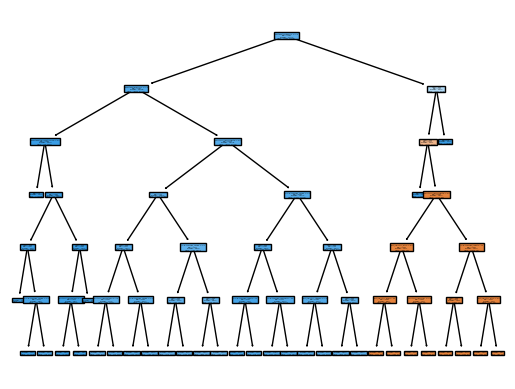

In [255]:
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True)

In [269]:
y_pred_train = model.predict(explicativas)

In [278]:
OneHot_Hosp_train['pred'] = y_pred_train
OneHot_Hosp_train.sample(20)[['pred', 'stay']]

,pred,stay
392394,1,1
155878,1,1
398140,1,1
166137,1,1
199923,1,1
161341,1,1
12023,1,1
364258,0,0
312132,1,1
317723,0,0


In [264]:
from sklearn.metrics import (accuracy_score, recall_score, confusion_matrix)

Matriz de confusion

In [280]:
matriz_confusion = confusion_matrix(objetivo, y_pred_train)
matriz_confusion

array([[ 26127,  35255],
       [   383, 348235]], dtype=int64)

Calculo el accurancy

In [283]:
accurancy = accuracy_score(objetivo, y_pred_train)
accurancy

0.9130780487804878

Calculo el recall

In [284]:
recall = recall_score(objetivo, y_pred_train)
recall

0.9989013762915283

Predecimos el hospitalizaciones_test.csc

In [ ]:
explicativas = OneHot_Hosp_test.drop(columns=['stay'])


In [288]:
y_pred_test = model.predict(OneHot_Hosp_test)

Lo metemos en un csv con la columna predi

In [295]:
Prediccion = pd.DataFrame(y_pred_test, columns=['predi'])
Prediccion.head(50)

,predi
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
